This is a dataset related to survey I was part of.
#WHO want to identify divisions where there is highest number of children to run vaccination campaign. 
The data set contains some information about people living in a household
There are approximately 950 clusters with varying numbers of households.
From each cluster on average 6 households are interviewed.
However WHO was not able to conduct survey in all clusters therefore some clusters have blank values.
These can be identified from by comparing column ID-2 and PREPOPULATE-Cluster_Code. These both columns have same information however if the survey was not conducted ID-2 is blank.


From this data I will try to find clusters where more resources are required


In [1]:
import pandas as pd
import numpy as np

In [2]:
df_eligible=pd.read_csv("Eligible_Children.csv")
df_eligible["count"]=1  #this is handy when counting number of occurance 
df_eligible.head()

,SubmissionDate,Enumerator_Name,Enumerator_Mobile,Survey_Day,Survey_Time,Mobile_ID,note_Application_Setting,group_check_constraints-note_missing_username,group_check_constraints-note_missing_phone_number,note_APPLICATION_VERSION,...,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected,Status,ReviewState,DeviceID,Edits,FormVersion,count
0,2022-11-18T07:16:26.361Z,Hina Gul Mardan,3149719695,2022-11-18,12:00,collect:8fDKaSxEgfwIkigj,NaN,NaN,NaN,NaN,...,41,KPK-19Arif Raza Baig-Mardan-03459872282,1,1,NaN,NaN,collect:8fDKaSxEgfwIkigj,0,2211051311,1
1,2022-11-18T07:13:46.628Z,Ruhi Gul Diamer,3435024421,2022-11-18,11:33,collect:AlUQiNYZSiNPs36M,NaN,NaN,NaN,NaN,...,85,GB-5Mujeeb Khan-3491057728-Chilas,1,1,NaN,NaN,collect:AlUQiNYZSiNPs36M,0,2211051316,1
2,2022-11-18T06:32:43.427Z,Ruhi Gul Diamer,3435024421,2022-11-18,11:21,collect:AlUQiNYZSiNPs36M,NaN,NaN,NaN,NaN,...,85,GB-5Mujeeb Khan-3491057728-Chilas,1,1,NaN,NaN,collect:AlUQiNYZSiNPs36M,0,2211051316,1
3,2022-11-18T06:20:38.324Z,Ruhi Gul Diamer,3435024421,2022-11-18,11:02,collect:AlUQiNYZSiNPs36M,NaN,NaN,NaN,NaN,...,85,GB-5Mujeeb Khan-3491057728-Chilas,1,1,NaN,NaN,collect:AlUQiNYZSiNPs36M,0,2211051316,1
4,2022-11-18T06:13:39.280Z,sumaira,3366465828,2022-11-18,10:52,collect:Y5xFR428z8E75GDa,NaN,NaN,NaN,NaN,...,35,KPK-13Saeed Khan Bangash-Kohat-3348317007,1,1,NaN,NaN,collect:Y5xFR428z8E75GDa,0,2211051316,1


Before starting with the analysis, I will clean the data. From above it can be seen that there are a lot of columns. So I need to first narrow down the useful columns

In [3]:
columns=list(df_eligible)
print(columns)

['SubmissionDate', 'Enumerator_Name', 'Enumerator_Mobile', 'Survey_Day', 'Survey_Time', 'Mobile_ID', 'note_Application_Setting', 'group_check_constraints-note_missing_username', 'group_check_constraints-note_missing_phone_number', 'note_APPLICATION_VERSION', 'PREPOPULATE-Cluster_Code', 'PREPOPULATE-Cluster_Code_2', 'ID_2', 'caluname', 'Detail-ID', 'Detail-Province_name', 'Detail-Division', 'Detail-District_name', 'Detail-Tehsil_name', 'Detail-Unname', 'Detail-Ucmo_name', 'Detail-Settlement_name', 'Detail-Estimated_No_of_Households', 'KEY', 'Detail-Cluster_No_BY_DEPARTMENT', 'ss-HH07', 'MALE', 'FEMALE', 'Total', 'Not_Eligible', 'Eligible_Children', 'start_count', 'start_date', 'endtime', 'start-geopoint-Latitude', 'start-geopoint-Longitude', 'start-geopoint-Altitude', 'start-geopoint-Accuracy', 'meta-audit', 'meta-instanceID', 'meta-instanceName', 'SubmitterID', 'SubmitterName', 'AttachmentsPresent', 'AttachmentsExpected', 'Status', 'ReviewState', 'DeviceID', 'Edits', 'FormVersion', 'co

For the data analysis a lot of these columns are not useful. 
From the list the following columns will be deleted
['SubmissionDate', 'Enumerator_Name', 'Enumerator_Mobile', 'Survey_Day', 'Survey_Time', 'Mobile_ID', 'note_Application_Setting', 'group_check_constraints-note_missing_username', 'group_check_constraints-note_missing_phone_number', 'note_APPLICATION_VERSION','start_date', 'endtime', 'start-geopoint-Latitude', 'start-geopoint-Longitude', 'start-geopoint-Altitude', 'start-geopoint-Accuracy', 'meta-audit', 'meta-instanceID', 'meta-instanceName', 'SubmitterID', 'SubmitterName', 'AttachmentsPresent', 'AttachmentsExpected', 'Status', 'ReviewState', 'DeviceID', 'Edits', 'FormVersion']

The rest of the columns will be further checked to evaluate there usefullness.

In [4]:
not_required=['SubmissionDate', 'Enumerator_Name', 'Enumerator_Mobile', 'Survey_Day', 'Survey_Time', 'Mobile_ID', 'note_Application_Setting', 'group_check_constraints-note_missing_username', 'group_check_constraints-note_missing_phone_number', 'note_APPLICATION_VERSION','start_date', 'endtime', 'start-geopoint-Latitude', 'start-geopoint-Longitude', 'start-geopoint-Altitude', 'start-geopoint-Accuracy', 'meta-audit', 'meta-instanceID', 'meta-instanceName', 'SubmitterID', 'SubmitterName', 'AttachmentsPresent', 'AttachmentsExpected', 'Status', 'ReviewState', 'DeviceID', 'Edits', 'FormVersion']

def del_columns(df,cols):
    for i in cols:
        del df[i]
    return df

df_eligible=del_columns(df_eligible,not_required)
x=list(df_eligible)
print(x)


['PREPOPULATE-Cluster_Code', 'PREPOPULATE-Cluster_Code_2', 'ID_2', 'caluname', 'Detail-ID', 'Detail-Province_name', 'Detail-Division', 'Detail-District_name', 'Detail-Tehsil_name', 'Detail-Unname', 'Detail-Ucmo_name', 'Detail-Settlement_name', 'Detail-Estimated_No_of_Households', 'KEY', 'Detail-Cluster_No_BY_DEPARTMENT', 'ss-HH07', 'MALE', 'FEMALE', 'Total', 'Not_Eligible', 'Eligible_Children', 'start_count', 'count']


Further I will check if there are duplicate columns and delete them.

In [5]:
df_eligible=df_eligible.T.drop_duplicates().T 
x=list(df_eligible)
print(x)

['PREPOPULATE-Cluster_Code', 'ID_2', 'caluname', 'Detail-Province_name', 'Detail-Division', 'Detail-District_name', 'Detail-Tehsil_name', 'Detail-Unname', 'Detail-Settlement_name', 'Detail-Estimated_No_of_Households', 'KEY', 'Detail-Cluster_No_BY_DEPARTMENT', 'ss-HH07', 'MALE', 'FEMALE', 'Not_Eligible', 'Eligible_Children', 'start_count', 'count']


ssh07 is total number of family members

In [6]:
df_eligible = df_eligible.rename(columns={'ss-HH07': 'Total_members',"PREPOPULATE-Cluster_Code":"Cluster_code"})
df_eligible


,Cluster_code,ID_2,caluname,Detail-Province_name,Detail-Division,Detail-District_name,Detail-Tehsil_name,Detail-Unname,Detail-Settlement_name,Detail-Estimated_No_of_Households,KEY,Detail-Cluster_No_BY_DEPARTMENT,Total_members,MALE,FEMALE,Not_Eligible,Eligible_Children,start_count,count
0,891,891.0,NaN,Khyber PakhtunKhwa,Mardan,Mardan,Mardan,Sikandari Purdil Abad,Sultan Mehmood,370,uuid:0c62d8f5-6ff1-4d56-b377-23b59233a260,4627,9,3,6,8.0,1.0,1,1
1,550,550.0,NaN,Gilgit Baltistan,Diamer,Diamer,Chilas,MC Chilas,Sidy toon School,500,uuid:ebc46a1a-9308-49a9-a746-e9abde049554,3222,7,4,3,2.0,5.0,5,1
2,548,548.0,NaN,Gilgit Baltistan,Diamer,Diamer,Chilas,MC Chilas,Govt. area Madal school,500,uuid:d8e220b9-ec76-461d-82e3-265debe0e6a7,3220,12,6,6,5.0,7.0,7,1
3,548,548.0,NaN,Gilgit Baltistan,Diamer,Diamer,Chilas,MC Chilas,Govt. area Madal school,500,uuid:5a501500-d72a-40d6-ab58-ed94a18e4106,3220,7,3,4,2.0,5.0,5,1
4,796,796.0,NaN,Khyber PakhtunKhwa,Kohat,Kohat,Kohat,URBAN-3,Chakar Maila-4,461,uuid:0e4c7d4c-195d-4b7f-8f3f-efec4bb11267,4428,6,4,2,3.0,3.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,953,NaN,NaN,Khyber PakhtunKhwa,Peshawar,Peshawar,Town 3,Musa Zai / Pandu,Zandai Road Side,688,uuid:56f34022-eeaf-4147-9218-fdb00949aaf4,4689,8,5,3,NaN,NaN,6,1
5795,953,NaN,NaN,Khyber PakhtunKhwa,Peshawar,Peshawar,Town 3,Musa Zai / Pandu,Zandai Road Side,688,uuid:e5533063-f64b-4312-ae7f-12dc7c350441,4689,7,4,3,NaN,NaN,2,1
5796,675,675.0,NaN,Khyber PakhtunKhwa,DI Khan,DI Khan,DI Khan,Dera City II,Wapda Colony,4505,uuid:37083cde-e678-46e1-aa2d-1ee44cb667a3,4203,5,2,3,2.0,3.0,3,1
5797,895,895.0,NaN,Khyber PakhtunKhwa,Mardan,Swabi,Lahore,Matani Changan,Kashemeryan,567,uuid:6b5803a0-db55-4825-bb71-ca1b2ac09ace,4631,8,5,3,5.0,3.0,3,1


Now I will create a new dataframe that only contains the clusters for which all the survey was carried out. 

In [7]:
df=df_eligible.dropna( subset="ID_2")

#df['PREPOPULATE-Cluster_Code'] = df['PREPOPULATE-Cluster_Code'].astype(int)
#df.dtypes
df["Detail-Estimated_No_of_Households"].unique()

array(['370', '500', '461', '700', '4591', '758', '580', '192', '10',
       '976', '61', '65', '82', '595', '108', '58', '49', '142', '101',
       '50', '56', '51', '45', '79', '188', '98', '660', '176', '22',
       '77', '165', '86', '302', '114', '280', '250', '270', '295', '42',
       '68', '21', '94', '8', '224', '324', '340', '95', '230', '37',
       '13', '70', '116', '167', '1596', '4403', '140', '602', '172',
       '20', '19', '385', '71', '127', '506', '124', '91', '160', '107',
       '15', '52', '53', '330', '75', '46', '296', '144', '249', '318',
       '373', '143', '93', '89', '115', '139', '610', '513', '145', '158',
       '436', '43', '474', '96', '615', '239', '228', '628', '62', '292',
       '1097', '25', '26', '33', '463', '759', '1836', '92', '100', '134',
       '592', '2000', '685', '1088', '1824', '30', '117', '83', '287',
       '67', '438', '27', '80', '147', '41', '267', '202', '128', '326',
       'Khyber Flates', '191', '310', '74', '105', '29', '48'

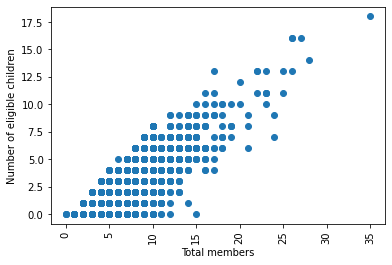

In [8]:
import matplotlib.pyplot as plt

x=df["Total_members"]
y=df["Eligible_Children"]
plt.scatter(x,y)
plt.xlabel('Total members')
plt.ylabel('Number of eligible children')
#plt.title("Division wise eligible children")
plt.xticks(rotation=90)
plt.show()

The data shows that there are instances where total members is 0. During the survey, sometimes, no one was at home therefor its showing 0. Hence I decided to delete these entries since it would skew our results.

In [9]:
df = df[(df.Total_members > 0) ]
df

,Cluster_code,ID_2,caluname,Detail-Province_name,Detail-Division,Detail-District_name,Detail-Tehsil_name,Detail-Unname,Detail-Settlement_name,Detail-Estimated_No_of_Households,KEY,Detail-Cluster_No_BY_DEPARTMENT,Total_members,MALE,FEMALE,Not_Eligible,Eligible_Children,start_count,count
0,891,891.0,NaN,Khyber PakhtunKhwa,Mardan,Mardan,Mardan,Sikandari Purdil Abad,Sultan Mehmood,370,uuid:0c62d8f5-6ff1-4d56-b377-23b59233a260,4627,9,3,6,8.0,1.0,1,1
1,550,550.0,NaN,Gilgit Baltistan,Diamer,Diamer,Chilas,MC Chilas,Sidy toon School,500,uuid:ebc46a1a-9308-49a9-a746-e9abde049554,3222,7,4,3,2.0,5.0,5,1
2,548,548.0,NaN,Gilgit Baltistan,Diamer,Diamer,Chilas,MC Chilas,Govt. area Madal school,500,uuid:d8e220b9-ec76-461d-82e3-265debe0e6a7,3220,12,6,6,5.0,7.0,7,1
3,548,548.0,NaN,Gilgit Baltistan,Diamer,Diamer,Chilas,MC Chilas,Govt. area Madal school,500,uuid:5a501500-d72a-40d6-ab58-ed94a18e4106,3220,7,3,4,2.0,5.0,5,1
4,796,796.0,NaN,Khyber PakhtunKhwa,Kohat,Kohat,Kohat,URBAN-3,Chakar Maila-4,461,uuid:0e4c7d4c-195d-4b7f-8f3f-efec4bb11267,4428,6,4,2,3.0,3.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,110,110.0,NaN,AJK,Poonch,Haveli,Havali,Changil,"Chanjal Mohri Danish Public School, Alam Din H...",180,uuid:7a5d2612-3622-4994-8745-88763c45436e,1314,6,2,4,2.0,4.0,4,1
5792,784,784.0,NaN,Khyber PakhtunKhwa,Kohat,Kohat,Kohat,URBAN-1,Behzadi Chikar Kot,335,uuid:e50c210a-6986-4cd4-a9bd-294c521b9d58,4416,4,2,2,2.0,2.0,2,1
5793,895,895.0,NaN,Khyber PakhtunKhwa,Mardan,Swabi,Lahore,Matani Changan,Kashemeryan,567,uuid:042e7d27-de70-4a82-8007-61649b887d56,4631,3,2,1,3.0,0.0,1,1
5796,675,675.0,NaN,Khyber PakhtunKhwa,DI Khan,DI Khan,DI Khan,Dera City II,Wapda Colony,4505,uuid:37083cde-e678-46e1-aa2d-1ee44cb667a3,4203,5,2,3,2.0,3.0,3,1


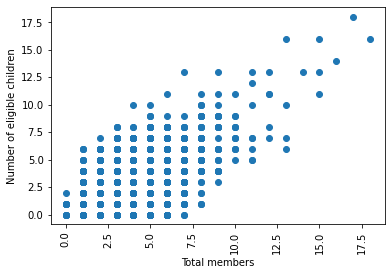

In [10]:
x=df["MALE"]
y=df["Eligible_Children"]
plt.scatter(x,y)
plt.xlabel('Total members')
plt.ylabel('Number of eligible children')
#plt.title("Division wise eligible children")
plt.xticks(rotation=90)
plt.show()

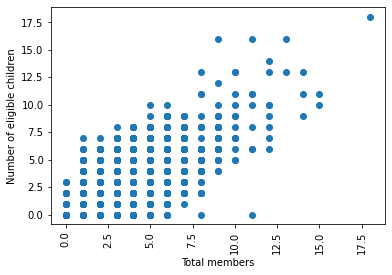

In [11]:
x=df["FEMALE"]
y=df["Eligible_Children"]
plt.scatter(x,y)
plt.xlabel('Total members')
plt.ylabel('Number of eligible children')
#plt.title("Division wise eligible children")
plt.xticks(rotation=90)
plt.show()

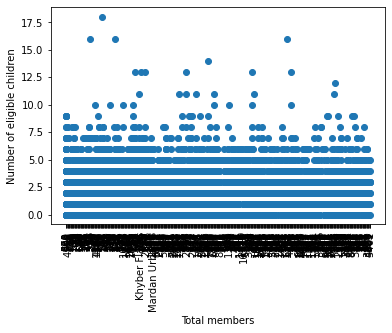

In [12]:

x=df["Detail-Estimated_No_of_Households"]
y=df["Eligible_Children"]
plt.scatter(x,y)
plt.xlabel('Total members')
plt.ylabel('Number of eligible children')
#plt.title("Division wise eligible children")
plt.xticks(rotation=90)
plt.show()

There seems to be no relation between estimated number of households and number of eligible children. However there seems to be 2 entries on x-axis that should not be there. I will change them to 0 just make the data clean.

In [13]:
df["Detail-Estimated_No_of_Households"].unique()

array(['370', '500', '461', '700', '4591', '758', '580', '192', '10',
       '976', '61', '65', '82', '595', '108', '58', '49', '142', '101',
       '50', '56', '51', '45', '79', '188', '98', '660', '176', '22',
       '77', '165', '86', '302', '114', '280', '250', '270', '295', '42',
       '68', '21', '94', '8', '224', '324', '340', '95', '230', '37',
       '13', '70', '116', '167', '1596', '4403', '140', '602', '172',
       '20', '19', '385', '71', '127', '506', '124', '91', '160', '107',
       '15', '52', '53', '330', '75', '46', '296', '144', '249', '318',
       '373', '143', '93', '89', '115', '139', '610', '513', '145', '158',
       '436', '43', '474', '96', '615', '239', '228', '628', '62', '292',
       '1097', '25', '26', '33', '463', '759', '1836', '92', '100', '134',
       '592', '2000', '685', '1088', '1824', '30', '117', '83', '287',
       '67', '438', '27', '80', '147', '41', '267', '202', '128', '326',
       'Khyber Flates', '191', '310', '74', '105', '29', '48'

In [14]:
df = df.replace('Mardan Urban 3',0)
df = df.replace('Khyber Flates',0)

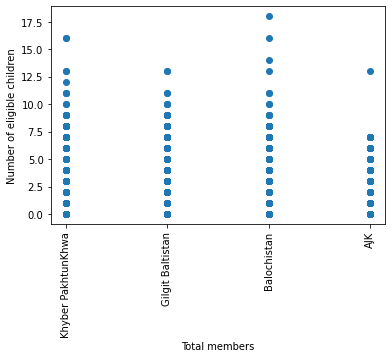

In [15]:

x=df["Detail-Province_name"]
y=df["Eligible_Children"]
plt.scatter(x,y)
plt.xlabel('Total members')
plt.ylabel('Number of eligible children')
#plt.title("Division wise eligible children")
plt.xticks(rotation=90)
plt.show()

This does not give much insight, however taking average for each province might help

In [16]:
#df["count"]=1  #this is to count the number of houses 
#df_province_mean= df.groupby(["Detail-Province_name"], as_index=False).agg(N=("Detail-Province_name","count"))
df_province_mean= df.groupby("Detail-Province_name", as_index=False).sum().reset_index()
df_province_mean["mean_province"]=df_province_mean["Eligible_Children"]/df_province_mean["count"]
df_province_mean=df_province_mean[["Detail-Province_name","mean_province"]]
df=pd.merge(df,df_province_mean, how="inner", left_on=["Detail-Province_name"],right_on=["Detail-Province_name"])
df

,Cluster_code,ID_2,caluname,Detail-Province_name,Detail-Division,Detail-District_name,Detail-Tehsil_name,Detail-Unname,Detail-Settlement_name,Detail-Estimated_No_of_Households,KEY,Detail-Cluster_No_BY_DEPARTMENT,Total_members,MALE,FEMALE,Not_Eligible,Eligible_Children,start_count,count,mean_province
0,891,891.0,NaN,Khyber PakhtunKhwa,Mardan,Mardan,Mardan,Sikandari Purdil Abad,Sultan Mehmood,370,uuid:0c62d8f5-6ff1-4d56-b377-23b59233a260,4627,9,3,6,8.0,1.0,1,1,2.455307
1,796,796.0,NaN,Khyber PakhtunKhwa,Kohat,Kohat,Kohat,URBAN-3,Chakar Maila-4,461,uuid:0e4c7d4c-195d-4b7f-8f3f-efec4bb11267,4428,6,4,2,3.0,3.0,3,1,2.455307
2,678,678.0,NaN,Khyber PakhtunKhwa,DI Khan,DI Khan,DI Khan,Dera City IV,Mohallah Gosaian Wal,700,uuid:3dd5ae55-ab69-48e5-8121-425ff977024e,4206,4,3,1,2.0,2.0,2,1,2.455307
3,674,674.0,NaN,Khyber PakhtunKhwa,DI Khan,DI Khan,DI Khan,Dera City I,City 1,4591,uuid:1e919a00-b624-470b-b0e4-f4efcd1d0d85,4202,3,1,2,2.0,1.0,1,1,2.455307
4,717,717.0,NaN,Khyber PakhtunKhwa,DI Khan,Tank,Tank,Tank City-I,Barki Abad,758,uuid:7123b6ba-a120-4c68-82d5-9975da0a6530,4245,10,3,7,7.0,3.0,3,1,2.455307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,92,92.0,NaN,AJK,Muzaffarabad,Neelum,Athmuqam,Town Committee - Athmuqam,"salkhala, Athmuqam",674,uuid:f3343179-1a7c-4a64-ad2c-28ed2fd07902,1244,10,5,5,4.0,6.0,6,1,2.035667
5068,92,92.0,NaN,AJK,Muzaffarabad,Neelum,Athmuqam,Town Committee - Athmuqam,"salkhala, Athmuqam",674,uuid:f2ba4897-60e9-41f5-b39d-13f9a0032a16,1244,2,1,1,2.0,0.0,0,1,2.035667
5069,92,92.0,NaN,AJK,Muzaffarabad,Neelum,Athmuqam,Town Committee - Athmuqam,"salkhala, Athmuqam",674,uuid:502f19ec-103f-4d4a-8e6e-31f4d72a6b6e,1244,4,2,2,2.0,2.0,2,1,2.035667
5070,92,92.0,NaN,AJK,Muzaffarabad,Neelum,Athmuqam,Town Committee - Athmuqam,"salkhala, Athmuqam",674,uuid:d2ca3693-de2f-4431-864a-9cec8a3ec2a0,1244,8,4,4,2.0,6.0,6,1,2.035667


Same can be done for division, however after district, tehsil, unname, settlement name can not be used. This is because the clusters for which the data needs to be predicted might have different values for these columns. 

In [17]:
df_division_mean= df.groupby("Detail-Division", as_index=False).sum().reset_index()
df_division_mean["mean_division"]=df_division_mean["Eligible_Children"]/df_division_mean["count"]
df_division_mean=df_division_mean[["Detail-Division","mean_division"]]
df=pd.merge(df,df_division_mean, how="inner", left_on=["Detail-Division"],right_on=["Detail-Division"])
df

,Cluster_code,ID_2,caluname,Detail-Province_name,Detail-Division,Detail-District_name,Detail-Tehsil_name,Detail-Unname,Detail-Settlement_name,Detail-Estimated_No_of_Households,...,Detail-Cluster_No_BY_DEPARTMENT,Total_members,MALE,FEMALE,Not_Eligible,Eligible_Children,start_count,count,mean_province,mean_division
0,891,891.0,NaN,Khyber PakhtunKhwa,Mardan,Mardan,Mardan,Sikandari Purdil Abad,Sultan Mehmood,370,...,4627,9,3,6,8.0,1.0,1,1,2.455307,2.488095
1,792,792.0,NaN,Khyber PakhtunKhwa,Mardan,Mardan,Mardan,Distict Mobile Teams,Dr Imtiaz Ali sb,0,...,1494,4,3,1,4.0,0.0,0,1,2.455307,2.488095
2,792,792.0,NaN,Khyber PakhtunKhwa,Mardan,Mardan,Mardan,Distict Mobile Teams,Dr Imtiaz Ali sb,0,...,1494,6,3,3,3.0,3.0,3,1,2.455307,2.488095
3,792,792.0,NaN,Khyber PakhtunKhwa,Mardan,Mardan,Mardan,Distict Mobile Teams,Dr Imtiaz Ali sb,0,...,1494,6,3,3,2.0,4.0,4,1,2.455307,2.488095
4,792,792.0,NaN,Khyber PakhtunKhwa,Mardan,Mardan,Mardan,Distict Mobile Teams,Dr Imtiaz Ali sb,0,...,1494,12,6,6,6.0,6.0,6,1,2.455307,2.488095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,92,92.0,NaN,AJK,Muzaffarabad,Neelum,Athmuqam,Town Committee - Athmuqam,"salkhala, Athmuqam",674,...,1244,6,2,4,2.0,4.0,4,1,2.035667,2.251969
5068,92,92.0,NaN,AJK,Muzaffarabad,Neelum,Athmuqam,Town Committee - Athmuqam,"salkhala, Athmuqam",674,...,1244,10,5,5,4.0,6.0,6,1,2.035667,2.251969
5069,92,92.0,NaN,AJK,Muzaffarabad,Neelum,Athmuqam,Town Committee - Athmuqam,"salkhala, Athmuqam",674,...,1244,2,1,1,2.0,0.0,0,1,2.035667,2.251969
5070,92,92.0,NaN,AJK,Muzaffarabad,Neelum,Athmuqam,Town Committee - Athmuqam,"salkhala, Athmuqam",674,...,1244,4,2,2,2.0,2.0,2,1,2.035667,2.251969


In [18]:
df_regression=df[["Eligible_Children","Detail-Division","count","Total_members","MALE","FEMALE","mean_province","mean_division"]]
df_regression

,Eligible_Children,Detail-Division,count,Total_members,MALE,FEMALE,mean_province,mean_division
0,1.0,Mardan,1,9,3,6,2.455307,2.488095
1,0.0,Mardan,1,4,3,1,2.455307,2.488095
2,3.0,Mardan,1,6,3,3,2.455307,2.488095
3,4.0,Mardan,1,6,3,3,2.455307,2.488095
4,6.0,Mardan,1,12,6,6,2.455307,2.488095
...,...,...,...,...,...,...,...,...
5067,4.0,Muzaffarabad,1,6,2,4,2.035667,2.251969
5068,6.0,Muzaffarabad,1,10,5,5,2.035667,2.251969
5069,0.0,Muzaffarabad,1,2,1,1,2.035667,2.251969
5070,2.0,Muzaffarabad,1,4,2,2,2.035667,2.251969


In [19]:

from scipy.sparse import coo_matrix

row_y  = np.arange(df_regression.shape[0])
col_y  = np.zeros(df_regression.shape[0])
data_y = np.array(df_regression["Eligible_Children"])
y=coo_matrix((data_y, (row_y, col_y)), shape=(df_regression.shape[0], 1)).toarray()

row_x, col_x = np.indices((df_regression.shape[0], df_regression.shape[1]-2))

# Get data from the DataFrame and convert to 1D array
data_x = np.array(df_regression.iloc[:, 2:]).ravel()

# Create sparse matrix
x = coo_matrix((data_x, (row_x.ravel(), col_x.ravel())), shape=(df_regression.shape[0], df_regression.shape[1]-2)).toarray()




Now solving for theta to get line of best fit

In [20]:
import scipy.linalg
import scipy as sp
def solve_neq(X, y):
    x_T= X.transpose()
    y_T = y.transpose()
    C=x_T.dot(X)
    b=x_T.dot(y)
    theta=sp.linalg.solve(C,b, assume_a="pos")
    return theta
print(solve_neq(x, y))

[[-1.22873149]
 [-0.84837953]
 [ 1.26954601]
 [ 1.35650734]
 [ 0.0592504 ]
 [ 0.32942404]]


<ipython-input-20-6c53548d599c>:8: LinAlgWarning: Ill-conditioned matrix (rcond=1.50998e-17): result may not be accurate.
  theta=sp.linalg.solve(C,b, assume_a="pos")


<ipython-input-109-1bbd932e0570>:7: LinAlgWarning: Ill-conditioned matrix (rcond=3.84587e-18): result may not be accurate.
  theta=sp.linalg.solve(C,b, assume_a="pos")
  
This error can be caused if the selected features are very closely related to each other. In this case it seems that Total members, Male and Female might be closely related. Hence I will remove male and female from the feature list. 
And repeat the steps again.

In [21]:
df_regression=df[["Eligible_Children","Detail-Division","count","Total_members","mean_province","mean_division"]]
row_y  = np.arange(df_regression.shape[0])
col_y  = np.zeros(df_regression.shape[0])
data_y = np.array(df_regression["Eligible_Children"])
y=coo_matrix((data_y, (row_y, col_y)), shape=(df_regression.shape[0], 1)).toarray()

row_x, col_x = np.indices((df_regression.shape[0], df_regression.shape[1]-2))

# Get data from the DataFrame and convert to 1D array
data_x = np.array(df_regression.iloc[:, 2:]).ravel()

# Create sparse matrix
x = coo_matrix((data_x, (row_x.ravel(), col_x.ravel())), shape=(df_regression.shape[0], df_regression.shape[1]-2)).toarray()
theta=solve_neq(x, y)
print(theta)


[[-1.23248476]
 [ 0.46434495]
 [ 0.06165525]
 [ 0.32599391]]


checking for accuracy by introducing perturbation in the x,y values to see its affect on theta values.

In [22]:
from numpy.random import default_rng

def perturb_system(X, y, eps):
    d_X=np.random.default_rng().uniform(low=-eps, high=eps, size=(X.shape[0],X.shape[1]))
    d_y=np.random.default_rng().uniform(low=-eps, high=eps, size=(y.shape[0],y.shape[1]))
    pert_X=X + d_X
    pert_y=y + d_y
    return pert_X,pert_y


def run_perturbation_trials(solver, X, y, eps=0.01, trials=1000):
    Thetas = np.zeros((X.shape[1], trials)) # Store all computed thetas
    for t in range(trials):
        X_p, y_p = perturb_system(X, y, eps)
        Thetas[:, t:t+1] = solver(X_p, y_p)
    return Thetas



Thetas_neq = run_perturbation_trials(solve_neq, x, y)
print(Thetas_neq[1])


[0.46427185 0.46437127 0.46427654 0.46424345 0.46423172 0.46436659
 0.46443241 0.46428372 0.46424148 0.46425636 0.46438511 0.46430249
 0.46424876 0.46437824 0.46432796 0.46444605 0.46430637 0.46419255
 0.46434495 0.46444775 0.46430433 0.46426583 0.46435191 0.46433553
 0.46445333 0.46431144 0.46436895 0.46439351 0.46438869 0.46418407
 0.46438145 0.46428389 0.46426769 0.46440173 0.46429767 0.46436068
 0.46419605 0.46429456 0.46442382 0.46437245 0.46422457 0.46431848
 0.46439408 0.46428034 0.46444011 0.46436543 0.46433483 0.46436788
 0.46427395 0.46429477 0.4643728  0.46441414 0.46432605 0.46428549
 0.46430279 0.46425248 0.46439892 0.46430665 0.46420184 0.46427527
 0.46436719 0.46431754 0.46416012 0.46443848 0.46425734 0.46422758
 0.46435831 0.46428489 0.46437788 0.46434453 0.46425413 0.46440397
 0.46437666 0.46432492 0.46430103 0.4643637  0.46425802 0.4643742
 0.46433612 0.46451926 0.46439309 0.46434704 0.46429618 0.46435128
 0.46432853 0.46426347 0.46435669 0.46440802 0.46430797 0.46433

The graphs below shows how the theta values change with perturbation

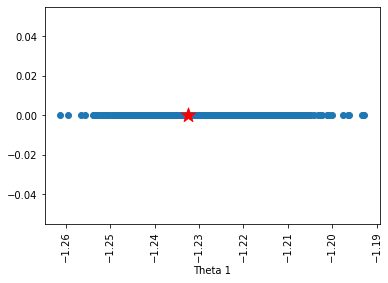

In [23]:
x1=Thetas_neq[0]
y1=np.zeros(len(Thetas_neq[0]))
plt.scatter(x1,y1)
plt.scatter(theta[0], 0, marker='*', color='red', s=15**2)
plt.xlabel('Theta 1')
plt.ylabel('')
#plt.title("Division wise eligible children")
plt.xticks(rotation=90)
plt.show()

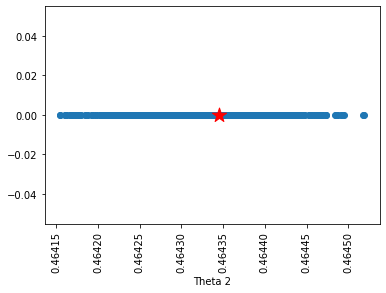

In [24]:
x2=Thetas_neq[1]
y2=np.zeros(len(Thetas_neq[1]))
plt.scatter(x2,y2)
plt.scatter(theta[1], 0, marker='*', color='red', s=15**2)
plt.xlabel('Theta 2')
plt.ylabel('')
#plt.title("Division wise eligible children")
plt.xticks(rotation=90)
plt.show()

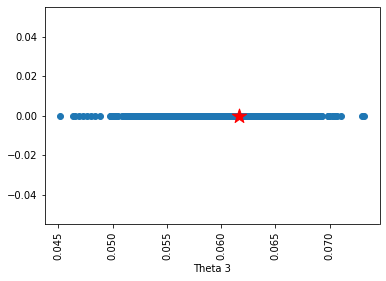

In [25]:
x3=Thetas_neq[2]
y3=np.zeros(len(Thetas_neq[2]))
plt.scatter(x3,y3)
plt.scatter(theta[2], 0, marker='*', color='red', s=15**2)
plt.xlabel('Theta 3')
plt.ylabel('')
#plt.title("Division wise eligible children")
plt.xticks(rotation=90)
plt.show()

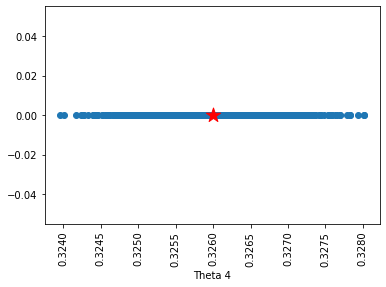

In [26]:
x4=Thetas_neq[3]
y4=np.zeros(len(Thetas_neq[3]))
plt.scatter(x4,y4)
plt.scatter(theta[3], 0, marker='*', color='red', s=15**2)
plt.xlabel('Theta 4')
plt.ylabel('')
#plt.title("Division wise eligible children")
plt.xticks(rotation=90)
plt.show()

The effect on pertubations is not to big for theta 1,2 and 4. However theta 3 is affected significantly. However I will keep the feature for this analysis since the feature is important.   

Finally using these theta values to predict the y values for the missing clusters!

In [27]:

empty_clusters=np.setdiff1d(np.array(df_eligible.Cluster_code),np.array(df_eligible.ID_2))

#df_eligible
df_eligible=df_eligible[df_eligible["Cluster_code"].isin(empty_clusters)]
df_eligible

,Cluster_code,ID_2,caluname,Detail-Province_name,Detail-Division,Detail-District_name,Detail-Tehsil_name,Detail-Unname,Detail-Settlement_name,Detail-Estimated_No_of_Households,KEY,Detail-Cluster_No_BY_DEPARTMENT,Total_members,MALE,FEMALE,Not_Eligible,Eligible_Children,start_count,count
23,1,NaN,NaN,AJK,Mirpur,Bhimber,Barnala,Barnala,Kadhala,408,uuid:f275f8de-73c6-499d-978c-78e64241ed39,1101,8,4,4,NaN,NaN,4,1
24,1,NaN,NaN,AJK,Mirpur,Bhimber,Barnala,Barnala,Kadhala,408,uuid:a84f22d2-4f56-4a75-a202-b1e02f5743bb,1101,8,6,2,NaN,NaN,3,1
25,1,NaN,NaN,AJK,Mirpur,Bhimber,Barnala,Barnala,Kadhala,408,uuid:42799462-fb49-48db-8d82-6bcc730e6a17,1101,6,4,2,NaN,NaN,3,1
26,1,NaN,NaN,AJK,Mirpur,Bhimber,Barnala,Barnala,Kadhala,408,uuid:11877f3c-983b-45d9-a3bc-da97b2bd4660,1101,4,2,2,NaN,NaN,0,1
27,1,NaN,NaN,AJK,Mirpur,Bhimber,Barnala,Barnala,Kadhala,408,uuid:1981f431-3e4a-4e4c-ba85-cfeac0246625,1101,5,2,3,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,953,NaN,NaN,Khyber PakhtunKhwa,Peshawar,Peshawar,Town 3,Musa Zai / Pandu,Zandai Road Side,688,uuid:c0ebbd95-7d4c-4bd0-b0a8-4b70d45801f3,4689,5,4,1,NaN,NaN,1,1
5789,953,NaN,NaN,Khyber PakhtunKhwa,Peshawar,Peshawar,Town 3,Musa Zai / Pandu,Zandai Road Side,688,uuid:67bca842-4f5d-4700-8056-588689c449ed,4689,5,2,3,NaN,NaN,2,1
5794,953,NaN,NaN,Khyber PakhtunKhwa,Peshawar,Peshawar,Town 3,Musa Zai / Pandu,Zandai Road Side,688,uuid:56f34022-eeaf-4147-9218-fdb00949aaf4,4689,8,5,3,NaN,NaN,6,1
5795,953,NaN,NaN,Khyber PakhtunKhwa,Peshawar,Peshawar,Town 3,Musa Zai / Pandu,Zandai Road Side,688,uuid:e5533063-f64b-4312-ae7f-12dc7c350441,4689,7,4,3,NaN,NaN,2,1


In [28]:

df_eligible=pd.merge(df_eligible,df_province_mean, how="inner", left_on=["Detail-Province_name"],right_on=["Detail-Province_name"])
df_eligible=pd.merge(df_eligible,df_division_mean, how="inner", left_on=["Detail-Division"],right_on=["Detail-Division"])
df_eligible

,Cluster_code,ID_2,caluname,Detail-Province_name,Detail-Division,Detail-District_name,Detail-Tehsil_name,Detail-Unname,Detail-Settlement_name,Detail-Estimated_No_of_Households,...,Detail-Cluster_No_BY_DEPARTMENT,Total_members,MALE,FEMALE,Not_Eligible,Eligible_Children,start_count,count,mean_province,mean_division
0,1,NaN,NaN,AJK,Mirpur,Bhimber,Barnala,Barnala,Kadhala,408,...,1101,8,4,4,NaN,NaN,4,1,2.035667,1.891051
1,1,NaN,NaN,AJK,Mirpur,Bhimber,Barnala,Barnala,Kadhala,408,...,1101,8,6,2,NaN,NaN,3,1,2.035667,1.891051
2,1,NaN,NaN,AJK,Mirpur,Bhimber,Barnala,Barnala,Kadhala,408,...,1101,6,4,2,NaN,NaN,3,1,2.035667,1.891051
3,1,NaN,NaN,AJK,Mirpur,Bhimber,Barnala,Barnala,Kadhala,408,...,1101,4,2,2,NaN,NaN,0,1,2.035667,1.891051
4,1,NaN,NaN,AJK,Mirpur,Bhimber,Barnala,Barnala,Kadhala,408,...,1101,5,2,3,NaN,NaN,1,1,2.035667,1.891051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,953,NaN,NaN,Khyber PakhtunKhwa,Peshawar,Peshawar,Town 3,Musa Zai / Pandu,Zandai Road Side,688,...,4689,5,4,1,NaN,NaN,1,1,2.455307,2.744000
720,953,NaN,NaN,Khyber PakhtunKhwa,Peshawar,Peshawar,Town 3,Musa Zai / Pandu,Zandai Road Side,688,...,4689,5,2,3,NaN,NaN,2,1,2.455307,2.744000
721,953,NaN,NaN,Khyber PakhtunKhwa,Peshawar,Peshawar,Town 3,Musa Zai / Pandu,Zandai Road Side,688,...,4689,8,5,3,NaN,NaN,6,1,2.455307,2.744000
722,953,NaN,NaN,Khyber PakhtunKhwa,Peshawar,Peshawar,Town 3,Musa Zai / Pandu,Zandai Road Side,688,...,4689,7,4,3,NaN,NaN,2,1,2.455307,2.744000


Now applying y=X*theta

In [29]:
df_pred = df_eligible.loc[:, ["Eligible_Children","Detail-Division","count","Total_members","mean_province","mean_division"]]
df_pred['count'] = df_pred['count'].astype(int)
df_pred['Eligible_Children'] = df_pred['Eligible_Children'].astype(float)
df_pred['Total_members'] = df_pred['Total_members'].astype(int)

# Create row and column indices
row_x, col_x = np.indices((df_pred.shape[0], df_pred.shape[1]-2))

# Get data from the DataFrame and convert to 1D array
data_x = np.array(df_pred.iloc[:, 2:]).ravel()

# Create sparse matrix
x =coo_matrix((data_x, (row_x.ravel(), col_x.ravel())), shape=(df_pred.shape[0], df_pred.shape[1]-2)).toarray()
y_pred=np.dot(x,theta)
y_pred=abs(np.around(y_pred, decimals=0, out=None))

print(y_pred)
#df_regression.dtypes

#df_pred["Total_members"].unique()

[[ 3.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 4.]
 [ 4.]
 [ 6.]
 [ 4.]
 [ 2.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 4.]
 [ 4.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 1.]
 [ 6.]
 [ 3.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 3.]
 [ 1.]
 [ 3.]
 [ 3.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 4.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 4.]
 [ 1.]
 [ 6.]
 [ 3.]
 [ 4.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 1.]
 [ 3.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 3.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 3.]
 [ 1.]
 [ 1.]
 [ 3.]
 [ 2.]
 [ 4.]
 [ 3.]
 [ 1.]
 [ 4.]
 [ 5.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 2.]
 [ 3.]
 [ 3.]
 [ 1.]
 [ 3.]
 [ 4.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 2.]
 [ 5.]
 [ 2.]
 [11.]
 [ 5.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 2.]

In [30]:
df_pred_children=pd.DataFrame(y_pred, columns = ["Eligible_Children"])
#df_pred_children
df_pred["Eligible_Children"]=df_pred_children["Eligible_Children"]
#df_pred=pd.concat([df_pred_children,df_pred],ignore_index=True)
df_pred

,Eligible_Children,Detail-Division,count,Total_members,mean_province,mean_division
0,3.0,Mirpur,1,8,2.035667,1.891051
1,3.0,Mirpur,1,8,2.035667,1.891051
2,2.0,Mirpur,1,6,2.035667,1.891051
3,1.0,Mirpur,1,4,2.035667,1.891051
4,2.0,Mirpur,1,5,2.035667,1.891051
...,...,...,...,...,...,...
719,2.0,Peshawar,1,5,2.455307,2.744000
720,2.0,Peshawar,1,5,2.455307,2.744000
721,4.0,Peshawar,1,8,2.455307,2.744000
722,3.0,Peshawar,1,7,2.455307,2.744000


In [31]:
df_final=pd.concat([df_pred,df_regression],ignore_index=True)
df_final

,Eligible_Children,Detail-Division,count,Total_members,mean_province,mean_division
0,3.0,Mirpur,1,8,2.035667,1.891051
1,3.0,Mirpur,1,8,2.035667,1.891051
2,2.0,Mirpur,1,6,2.035667,1.891051
3,1.0,Mirpur,1,4,2.035667,1.891051
4,2.0,Mirpur,1,5,2.035667,1.891051
...,...,...,...,...,...,...
5791,4.0,Muzaffarabad,1,6,2.035667,2.251969
5792,6.0,Muzaffarabad,1,10,2.035667,2.251969
5793,0.0,Muzaffarabad,1,2,2.035667,2.251969
5794,2.0,Muzaffarabad,1,4,2.035667,2.251969


Finally the data can be used to number of children for each division

In [32]:
df_final=df_final[['Detail-Division', 'Eligible_Children']].groupby('Detail-Division', as_index=False).sum().reset_index()
df_final=df_final.sort_values(by=["Eligible_Children"], ascending=False )
df_final

,index,Detail-Division,Eligible_Children
19,19,Zhob,1245.0
3,3,Diamer,1063.0
1,1,Bannu,826.0
16,16,Quetta,816.0
14,14,Peshawar,791.0
13,13,Nasirabad,785.0
6,6,Kalat,780.0
0,0,Baltistan,767.0
9,9,Malakand,766.0
4,4,Gilgit,720.0


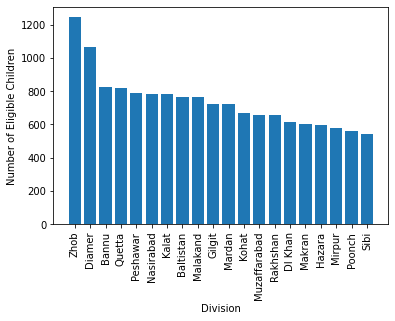

In [33]:
x=df_final["Detail-Division"]
y=df_final["Eligible_Children"]
plt.bar(x,y)
#plt.scatter(theta[2], 0, marker='*', color='red', s=15**2)
plt.xlabel('Division')
plt.ylabel('Number of Eligible Children')
#plt.title("Division wise eligible children")
plt.xticks(rotation=90)
plt.show()

From the bar chart it is clear that Zhob and Diamer clearly require more resources compared to other districts